In [1]:
import tensorflow as tf
import numpy as np



# IMPORTING DATA

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-02-22 12:26:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   118MB/s    in 1.6s    

2021-02-22 12:26:19 (118 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-02-22 12:26:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to

In [3]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('rock images:', len(os.listdir(rock_dir)))
print('paper images:', len(os.listdir(paper_dir)))
print('scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)


rock images: 840
paper images: 840
scissors images: 840



# IMAGE GENERATOR

In [5]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator


In [6]:
TRAINING_DIR = "/tmp/rps/"
VALIDATION_DIR = "/tmp/rps-test-set/"

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest') 
validation_datagen=ImageDataGenerator(rescale=1/255)


In [7]:
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


# MODEL BUILDING

In [8]:
model= tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                  
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                  
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                               
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                               
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.2),
                     
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')

])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# MODEL FIT

In [12]:
history=model.fit(train_generator,
                  epochs=25,
                  validation_data= validation_generator,
                  verbose=1,
                  validation_steps=3)

Epoch 1/25
20/20 [==============================] - 27s 997ms/step - loss: 1.8590 - accuracy: 0.3434 - val_loss: 1.1013 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 20s 989ms/step - loss: 1.1099 - accuracy: 0.3619 - val_loss: 1.0821 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 20s 987ms/step - loss: 1.0853 - accuracy: 0.4710 - val_loss: 0.8629 - val_accuracy: 0.7446
Epoch 4/25
20/20 [==============================] - 20s 983ms/step - loss: 0.9772 - accuracy: 0.5166 - val_loss: 0.5460 - val_accuracy: 0.7661
Epoch 5/25
20/20 [==============================] - 20s 984ms/step - loss: 0.8341 - accuracy: 0.5976 - val_loss: 0.5615 - val_accuracy: 0.8602
Epoch 6/25
20/20 [==============================] - 20s 990ms/step - loss: 0.7408 - accuracy: 0.6576 - val_loss: 0.8140 - val_accuracy: 0.5269
Epoch 7/25
20/20 [==============================] - 20s 984ms/step - loss: 0.6973 - accuracy: 0.7015 - val_loss: 0.1731 - val_accuracy: 0.9892

# CHECK FOR YOURSELF

In [21]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if((classes[0][0]>classes[0][1]) & (classes[0][0]>classes[0][2])):
    print("The image depicts a Paper")
  elif((classes[0][1]>classes[0][2]) & (classes[0][1]>classes[0][0])):
    print("The image depicts a Rock")
  else:
    print("The image depicts a Scissor")
  



Saving paper2.png to paper2 (1).png
paper2.png
The image depicts a Paper


# VISUALIZING THE RESULTS

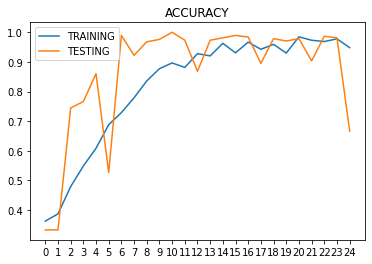

In [26]:
import matplotlib.pyplot as plt
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
plt.title("ACCURACY")

epochs=range(len(acc))
plt.xticks(epochs)
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.legend(["TRAINING","TESTING"]);

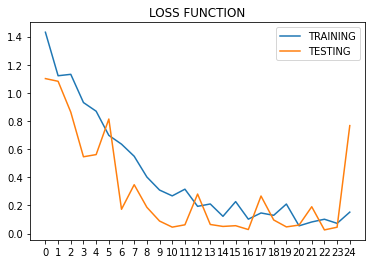

In [28]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(len(loss))
plt.title("LOSS FUNCTION")
plt.plot(epochs,loss)
plt.xticks(epochs)
plt.plot(epochs,val_loss)
plt.legend(["TRAINING","TESTING"]);